In [170]:
# Import Essential Libraries

import numpy as np
import pandas as pd

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

#model building
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

#performance matrics
from sklearn.metrics import mean_squared_error, r2_score

#pickle file
import pickle

In [95]:
# Loading Boston Housing Dataset

boston_df=pd.read_csv("housing.csv",delimiter=r"\s+",names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])

#top 5 rows of the boston dataset
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
# 14 features are there :

1. CRIM             - per capita crime rate by town
2. ZN               - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS            - proportion of non-retail business acres per town.
4. CHAS             - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX              - nitric oxides concentration (parts per 10 million)
6. RM               - average number of rooms per dwelling
7. AGE              - proportion of owner-occupied units built prior to 1940
8. DIS              - weighted distances to five Boston employment centres
9. RAD              - index of accessibility to radial highways
10. TAX             - full-value property-tax rate per 10,000 dollars.
11. PTRATIO         - pupil-teacher ratio by town
12. B               - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT           - % lower status of the population
14. MEDV            - Median value of owner-occupied homes in 1000's dollars

# Basic analysis of boston dataset

In [10]:
# shape of the dataset

shape=boston_df.shape
shape

(506, 14)

In [17]:
# no. of rows of the dataset

print("Number of records : \t", shape[0])

Number of records : 	 506


In [18]:
# no. of columns of the dataset

print("Number of Factors : \t", shape[1])

Number of Factors : 	 14


In [13]:
#features of the boston datasets

boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [14]:
# no. of records of the boston datasets

boston_df.index

RangeIndex(start=0, stop=506, step=1)

In [7]:
#top n rows of the boston dataset
# n=10
boston_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [8]:
#last n rows of the boston dataset
n=10
boston_df.tail(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
496,0.28960,0.0,9.69,0,0.585,5.390,72.9,2.7986,6,391.0,19.2,396.90,21.14,19.7
497,0.26838,0.0,9.69,0,0.585,5.794,70.6,2.8927,6,391.0,19.2,396.90,14.10,18.3
498,0.23912,0.0,9.69,0,0.585,6.019,65.3,2.4091,6,391.0,19.2,396.90,12.92,21.2
499,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391.0,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0,0.585,6.027,79.7,2.4982,6,391.0,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


# Exploratory Data Analysis

In [ ]:
EDA stands for exploratory data analysis where we do analysis and summary of our data by applying some statistical techniques
and graphical representation.

1)missing value detection
2)outlier detection
3)check data balancing
4)

In [19]:
#checking the features and data types of all features with non null count using info() function

boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [20]:
#desribe will give quick statistical summary of a dataset

boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [21]:
# all data types are in numerical value, so there will be no need of Encoding.

boston_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [22]:
# no null values are present in dataset

boston_df.isnull().mean()

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
MEDV       0.0
dtype: float64

In [ ]:
#Outliers detection:

1)Boxplot visualization method
2)Z-score
3)IQR technique

<AxesSubplot:>

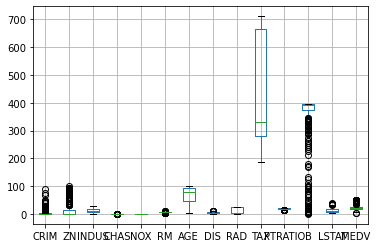

In [23]:
# Boxplot method
boston_df.boxplot()

<AxesSubplot:>

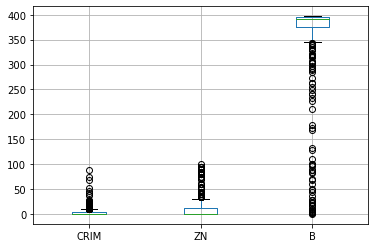

In [27]:
boston_df[["CRIM","ZN","B"]].boxplot()

In [ ]:
# Z-score method

In [28]:
from scipy.stats import zscore

In [31]:
def outlier(df):
    threshold=3
    for feature in ["CRIM","ZN","B"]:
        value=zscore(boston_df[feature])
        index=np.where(np.abs(value)>threshold)
        print("feature:",feature)
        print(boston_df[feature].iloc[index])
        print()
        
outlier(boston_df)

feature: CRIM
380    88.9762
398    38.3518
404    41.5292
405    67.9208
410    51.1358
414    45.7461
418    73.5341
427    37.6619
Name: CRIM, dtype: float64

feature: ZN
55      90.0
56      85.0
57     100.0
199     95.0
200     95.0
201     82.5
202     82.5
203     95.0
204     95.0
256     90.0
283     90.0
284     90.0
347     85.0
353     90.0
Name: ZN, dtype: float64

feature: B
102    70.80
410     2.60
411    35.05
412    28.79
415    27.25
416    21.57
418    16.45
419    48.45
423     2.52
424     3.65
425     7.68
426    24.65
427    18.82
429    60.72
431    81.33
436    27.49
437     9.32
438    68.95
445    43.06
450     0.32
454     6.68
455    50.92
456    10.48
457     3.50
466    22.01
Name: B, dtype: float64



In [ ]:
#IQR method

In [65]:
# calculate 25% and 75% quantile for "CRIM" feature
q1=boston_df["CRIM"].quantile(0.25)
q2=boston_df["CRIM"].quantile(0.75)

iqr=q2-q1

upper_tail_CRIM=q2 + (1.5*iqr)
lower_tail_CRIM=q1 - (1.5*iqr)

print("upper_tail_CRIM:",upper_tail_CRIM)
print("lower_tail_CRIM:",lower_tail_CRIM)

upper_tail_CRIM: 9.06963875
lower_tail_CRIM: -5.31051125


In [33]:
boston_df["CRIM"].loc[boston_df["CRIM"]>upper_tail_CRIM]

367    13.5222
371     9.2323
373    11.1081
374    18.4982
375    19.6091
        ...   
468    15.5757
469    13.0751
477    15.0234
478    10.2330
479    14.3337
Name: CRIM, Length: 66, dtype: float64

In [34]:
boston_df["CRIM"].loc[boston_df["CRIM"]<lower_tail_CRIM]

Series([], Name: CRIM, dtype: float64)

In [67]:
# calculate 25% and 75% quantile for "ZN" feature
q1=boston_df["ZN"].quantile(0.25)
q2=boston_df["ZN"].quantile(0.75)

iqr=q2-q1

upper_tail_ZN=q2 + (1.5*iqr)
lower_tail_ZN=q1 - (1.5*iqr)

print("upper_tail_ZN:",upper_tail_ZN)
print("lower_tail_ZN:",lower_tail_ZN)

upper_tail_ZN: 31.25
lower_tail_ZN: -18.75


In [36]:
boston_df["ZN"].loc[boston_df["ZN"]>upper_tail_ZN]

39     75.0
40     75.0
54     75.0
55     90.0
56     85.0
       ... 
351    60.0
352    60.0
353    90.0
354    80.0
355    80.0
Name: ZN, Length: 68, dtype: float64

In [37]:
boston_df["ZN"].loc[boston_df["ZN"]<lower_tail_ZN]

Series([], Name: ZN, dtype: float64)

In [68]:
# calculate 25% and 75% quantile for "B" feature
q1=boston_df["B"].quantile(0.25)
q2=boston_df["B"].quantile(0.75)

iqr=q2-q1

upper_tail_B=q2 + (1.5*iqr)
lower_tail_B=q1 - (1.5*iqr)

print("upper_tail_B:",upper_tail_B)
print("lower_tail_B:",lower_tail_B)

upper_tail_B: 427.49625000000003
lower_tail_B: 344.10624999999993


In [39]:
boston_df["B"].loc[boston_df["B"]>upper_tail_B]

Series([], Name: B, dtype: float64)

In [40]:
boston_df["B"].loc[boston_df["B"]<lower_tail_B]

18     288.99
25     303.42
27     306.38
32     232.60
34     248.31
        ...  
466     22.01
467    331.29
475    302.76
489    344.05
490    318.43
Name: B, Length: 77, dtype: float64

# Feature Engineering

In [ ]:
1)missing value handling
2)outliers handling
3)data balancing
4)encoding
5)feature scalling

In [41]:
# No missing values present in boston dataset

boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [43]:
#all datatypes are numerical,hence no encoding is required

boston_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [ ]:
#outliers handling
1)imputation method:impute with mode,median,upper_tail,lower_tail
2)delete method:delete all the outliers value from the dataset
3)transformation method

<AxesSubplot:>

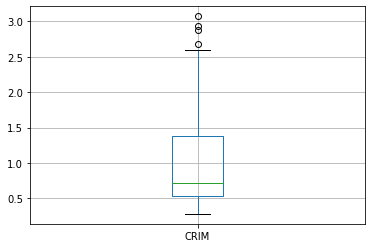

In [45]:
# transformation method:

boston_df["CRIM"]=np.sqrt(boston_df["CRIM"])

boston_df[["CRIM"]].boxplot()

<AxesSubplot:>

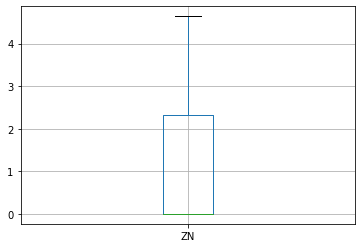

In [48]:
boston_df["ZN"]=np.cbrt(boston_df["ZN"])

boston_df[["ZN"]].boxplot()

<AxesSubplot:>

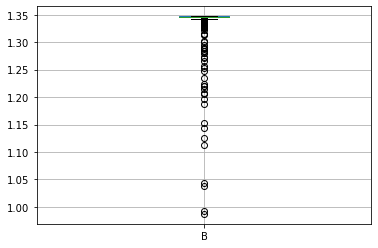

In [52]:
boston_df["B"]=np.cbrt(boston_df["B"])

boston_df[["B"]].boxplot()

In [ ]:
#deletion method we never follow because it comes under data loss

In [61]:
#imputation method: imputing outliers value with upper_tail and lower_tail

upper_tail=9.06963875,lower_tail=-5.31051125


C:\Users\JOTIBA\AppData\Local\Temp\ipykernel_10788\1574088786.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boston_df["CRIM"].loc[boston_df["CRIM"]>=upper_tail_CRIM]=upper_tail_CRIM


<AxesSubplot:>

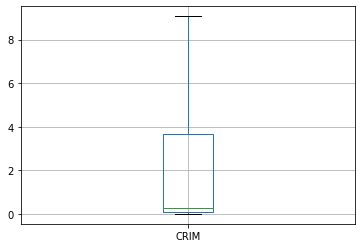

In [96]:
#CRIM feature:

print(f"upper_tail={upper_tail_CRIM},lower_tail={lower_tail_CRIM}")

boston_df["CRIM"].loc[boston_df["CRIM"]>=upper_tail_CRIM]=upper_tail_CRIM

boston_df[["CRIM"]].boxplot()

All upper_tail outliers value are now replaced with upper_tail value

upper_tail=31.25,lower_tail=-18.75


C:\Users\JOTIBA\AppData\Local\Temp\ipykernel_10788\3932711541.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boston_df["ZN"].loc[boston_df["ZN"]>=upper_tail_ZN]=upper_tail_ZN


<AxesSubplot:>

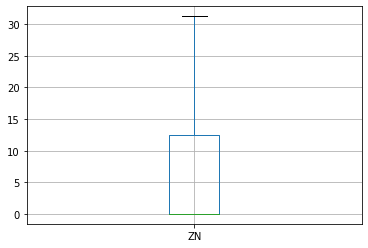

In [97]:
#ZN feature:

print(f"upper_tail={upper_tail_ZN},lower_tail={lower_tail_ZN}")

boston_df["ZN"].loc[boston_df["ZN"]>=upper_tail_ZN]=upper_tail_ZN

boston_df[["ZN"]].boxplot()

All upper_tail outliers value are now replaced with upper_tail value

upper_tail=427.49625000000003,lower_tail=344.10624999999993


C:\Users\JOTIBA\AppData\Local\Temp\ipykernel_10788\3983270035.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boston_df["B"].loc[boston_df["B"]<=lower_tail_B]=lower_tail_B


<AxesSubplot:>

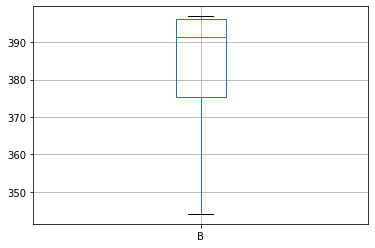

In [98]:
#B feature:

print(f"upper_tail={upper_tail_B},lower_tail={lower_tail_B}")

boston_df["B"].loc[boston_df["B"]<=lower_tail_B]=lower_tail_B

boston_df[["B"]].boxplot()

All lower_tail outliers value are now replaced with lower_tail value

<AxesSubplot:>

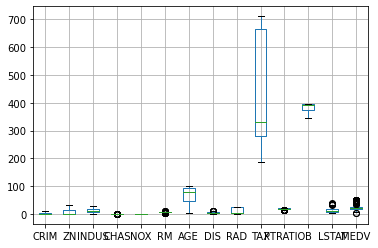

In [99]:
# withput outliers
boston_df.boxplot()

In [100]:
#feature scalling

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [101]:
x=boston_df.drop("MEDV",axis=1)

normal_scaler=MinMaxScaler()
normal_scaler.fit(x)
array=normal_scaler.transform(x)
df=pd.DataFrame(array,columns=x.columns)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.576,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.002316,0.000,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.002314,0.000,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.922908,0.063466
3,0.002874,0.000,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.957002,0.033389
4,0.006921,0.000,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.006213,0.000,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.906997,0.219095
502,0.004298,0.000,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815
503,0.006007,0.000,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892
504,0.011394,0.000,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.934651,0.131071


Now all features are in same scale

# feature selection

In [ ]:
# feature selection method:
1)filter method
2)wrapper method
3)embedded method

In [102]:
#filter method
#missing value detection

boston_df.isna().mean()

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
MEDV       0.0
dtype: float64

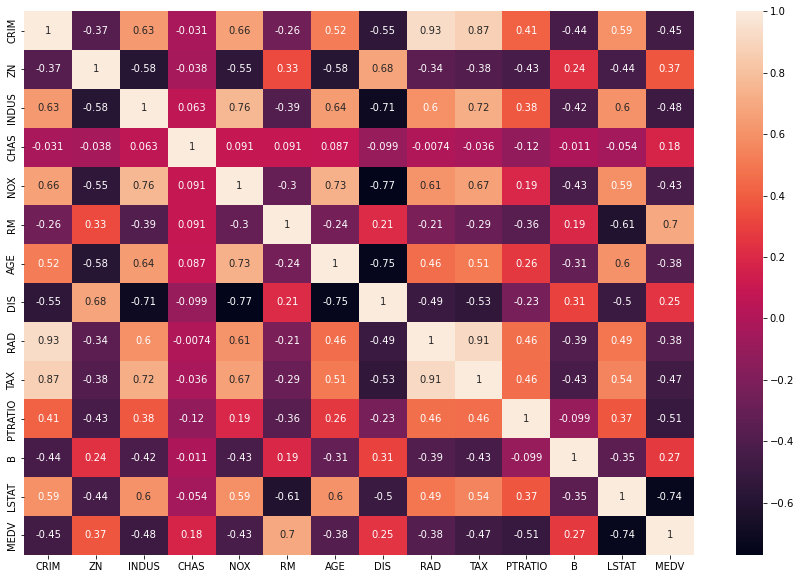

In [103]:
#correlation

correlation=boston_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation,annot=True)
plt.show()

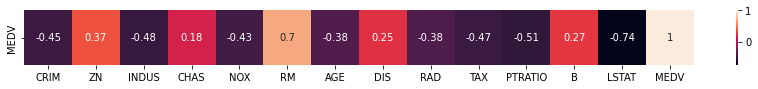

In [104]:
correlation=boston_df.corr()
a=correlation.tail(1)
plt.figure(figsize=(15,1))
sns.heatmap(a,annot=True)
plt.show()

<AxesSubplot:>

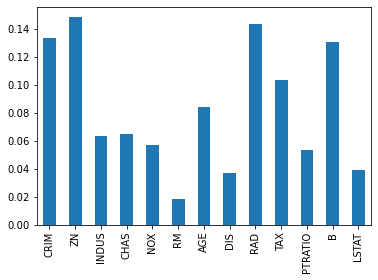

In [106]:
#variance threshold

variance=df.var()
variance.plot(kind="bar")

C:\Users\JOTIBA\anaconda3\lib\site-packages\skfeature\utility\construct_W.py:194: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  class_idx_all = class_idx[:, np.newaxis] & class_idx[np.newaxis, :]


<AxesSubplot:>

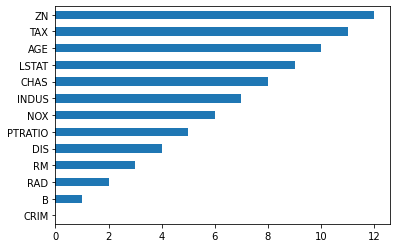

In [107]:
#fisher score

from skfeature.function.similarity_based import fisher_score
x=df
y=boston_df["MEDV"]
fisher_score=fisher_score.fisher_score(x.values,y)
s1=pd.Series(fisher_score,index=x.columns)
s1.sort_values().plot(kind="barh")

<AxesSubplot:>

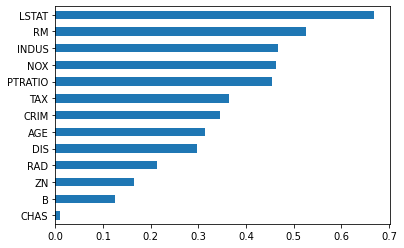

In [108]:
#information gain

from sklearn.feature_selection import mutual_info_regression

gain=mutual_info_regression(x,y)
s1=pd.Series(gain,index=x.columns)
s1.sort_values().plot(kind="barh")

From the above feature observations, we found that some columns are most important such as LSTAT and RM

# building machine learning model

In [149]:
#Splitting data as train and test data

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [150]:
#testing of train and test

x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,1.000000,0.0,0.646628,0.0,0.471193,0.333972,0.972194,0.088307,1.000000,0.914122,0.808511,0.101788,0.639625
15,0.068526,0.0,0.281525,0.0,0.314815,0.435524,0.552008,0.306359,0.130435,0.229008,0.893617,0.975755,0.185982
332,0.003127,1.0,0.205279,0.0,0.108848,0.473271,0.210093,0.501150,0.000000,0.223282,0.457447,0.343672,0.168322
423,0.777210,0.0,0.646628,0.0,0.471193,0.487066,0.846550,0.081132,1.000000,0.914122,0.808511,0.000000,0.594923
19,0.079384,0.0,0.281525,0.0,0.314815,0.415022,0.685891,0.242514,0.130435,0.229008,0.893617,0.887297,0.263521


In [151]:
x_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.009429,0.0,0.131598,0.0,0.257202,0.547040,0.836251,0.137921,0.173913,0.208015,0.425532,0.973482,0.201711
274,0.005530,1.0,0.218109,1.0,0.127572,0.612569,0.308960,0.268076,0.130435,0.127863,0.531915,1.000000,0.049669
491,0.010969,0.0,1.000000,0.0,0.460905,0.464074,0.987642,0.067155,0.130435,1.000000,0.797872,0.871386,0.450883
72,0.009414,0.0,0.379399,0.0,0.057613,0.479785,0.050463,0.378079,0.130435,0.225191,0.702128,0.886540,0.104581
452,0.560926,0.0,0.646628,0.0,0.674897,0.524238,0.915551,0.112632,1.000000,0.914122,0.808511,0.776299,0.428808


In [152]:
y_train.head()

477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
Name: MEDV, dtype: float64

In [153]:
y_test.head()

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: MEDV, dtype: float64

In [ ]:
#Linear Regression

In [154]:
LR=LinearRegression()
LR.fit(x_train,y_train)

print('Training Score : ', LR.score(x_train, y_train))
print('Testing Score  : ', LR.score(x_test, y_test))

print('R2 Score : ', r2_score(y_test, LR.predict(x_test)))
print('MSE : ', mean_squared_error(y_test, LR.predict(x_test)))

Training Score :  0.7340886635439579
Testing Score  :  0.6651082948279272
R2 Score :  0.6651082948279272
MSE :  24.558875689279592


In [ ]:
#DecisionTree Regression

In [155]:
DT_R=DecisionTreeRegressor(max_depth = 12, random_state = 92)
DT_R.fit(x_train,y_train)

print('Training Score : ', DT_R.score(x_train, y_train))
print('Testing Score  : ', DT_R.score(x_test, y_test))

print('R2 Score : ', r2_score(y_test, DT_R.predict(x_test)))
print('MSE : ', mean_squared_error(y_test,DT_R.predict(x_test)))

Training Score :  0.998482304664964
Testing Score  :  0.6982345100660492
R2 Score :  0.6982345100660492
MSE :  22.12960500408497


In [ ]:
#KNN Regression

In [156]:
KNN_R=KNeighborsRegressor(n_neighbors=10)
KNN_R.fit(x_train,y_train)

print('Training Score : ', KNN_R.score(x_train, y_train))
print('Testing Score  : ', KNN_R.score(x_test, y_test))

print('R2 Score : ', r2_score(y_test, KNN_R.predict(x_test)))
print('MSE : ', mean_squared_error(y_test,KNN_R.predict(x_test)))

Training Score :  0.7045995900165798
Testing Score  :  0.6392362369906821
R2 Score :  0.6392362369906821
MSE :  26.456171568627457


In [ ]:
#Randomforest Regression

In [162]:
RF_R= RandomForestRegressor(max_depth = 7, random_state = 63)
RF_R.fit(x_train, y_train)


print('Training Score : ', RF_R.score(x_train, y_train))
print('Testing Score  : ', RF_R.score(x_test, y_test))

print('R2 Score : ', r2_score(y_test, RF_R.predict(x_test)))
print('MSE : ', mean_squared_error(y_test, RF_R.predict(x_test)))


Training Score :  0.9613054109967731
Testing Score  :  0.8832536306620647
R2 Score :  0.8832536306620647
MSE :  8.561452933783118


# RF with hyperparameter tunning

In [166]:
rf_model=RandomForestRegressor(random_state=10)

hyp= {
      "n_estimators": np.arange(10,200),
      "max_depth":np.arange(5,15),
      "min_samples_split":np.arange(5,20),
      "min_samples_leaf":np.arange(4,15),
      "max_features":['auto']
}

rscv_rf_clf= RandomizedSearchCV(rf_model,hyp,cv=6)
rscv_rf_clf.fit(x_train,y_train)
rscv_rf_clf.best_estimator_

RandomForestRegressor(max_depth=9, min_samples_leaf=5, min_samples_split=8,
                      n_estimators=86, random_state=10)

In [167]:
RF_R= RandomForestRegressor(max_depth=13, min_samples_leaf=6, min_samples_split=12,n_estimators=55, random_state=10)
RF_R.fit(x_train, y_train)


print('Training Score : ', RF_R.score(x_train, y_train))
print('Testing Score  : ', RF_R.score(x_test, y_test))

print('R2 Score : ', r2_score(y_test, RF_R.predict(x_test)))
print('MSE : ', mean_squared_error(y_test, RF_R.predict(x_test)))


Training Score :  0.8997288307764947
Testing Score  :  0.8341161639595207
R2 Score :  0.8341161639595207
MSE :  12.164889261995075


# Comparing accuracy score

In [168]:
print("Linear Regression: ")
print('Testing Score : ', LR.score(x_test, y_test))
print()

print("Decision Tree Regression: ")
print('Testing Score  : ', DT_R.score(x_test, y_test))
print()

print("KNN Regression: ")
print('Testing Score  : ', KNN_R.score(x_test, y_test))
print()

print("RF Regression: ")
print('Testing Score  : ', RF_R.score(x_test, y_test))
print()

Linear Regression: 
Testing Score :  0.6651082948279272

Decision Tree Regression: 
Testing Score  :  0.6982345100660492

KNN Regression: 
Testing Score  :  0.6392362369906821

RF Regression: 
Testing Score  :  0.8341161639595207



In [169]:
print('Mean Squared Error : ', mean_squared_error(y_test, RF_R.predict(x_test)))
print('Root Mean Squared Error : ', mean_squared_error(y_test, RF_R.predict(x_test))**0.5)
print('Score : ', r2_score(y, RF_R.predict(x)))

Mean Squared Error :  12.164889261995075
Root Mean Squared Error :  3.487820130395929
Score :  0.8885666146774662


Finally we finishes the project. We have built a Random Forest Regressor Model and having the Training accuracy of 89% and Testing accuracy of 84%.